1. Import Necessary Libraries

In [21]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

2.Load and Analyse Dataset

In [22]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\AmesHousing.csv")
print(data.head())

print(data.info())

print(data.shape)

print(data.columns)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

3. Find Missing Values, Categorical Values

In [23]:
missing_val=data.isnull().sum()
print(missing_val)

non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64
Non-numeric columns: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


4.Analyse Data Distribution

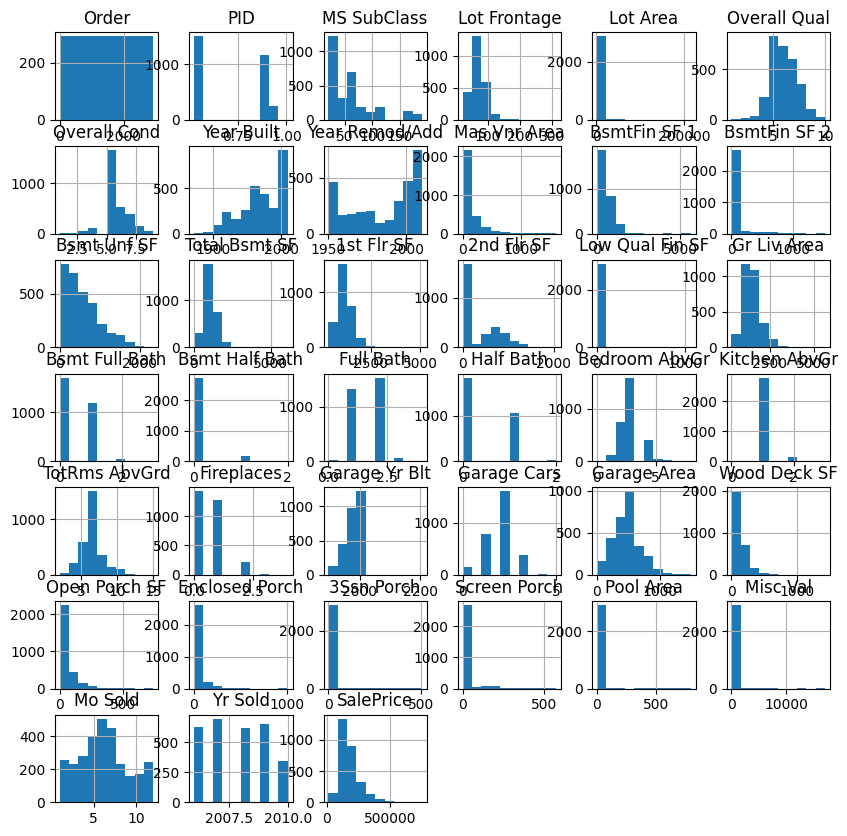

In [24]:
data.hist(figsize=(10, 10))
plt.show()

5. Handle Missing Values

In [25]:
#impute numerical values with median
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace=True)
data['Garage Area'].fillna(data['Garage Area'].median(), inplace=True)

#impute categorical features with most frequently occuring entry
data['Garage Type'].fillna(data['Garage Type'].mode()[0], inplace=True)
data['Bsmt Qual'].fillna(data['Bsmt Qual'].mode()[0], inplace=True)

#fill null values 
data['Pool Area'].fillna(0, inplace=True)
data['Garage Cars'].fillna(0, inplace=True)

6. Handle Outliers

In [26]:
data['Lot Area'] = np.log1p(data['Lot Area'])
data['Gr Liv Area'] = np.log1p(data['Gr Liv Area'])
data['SalePrice'] = np.log1p(data['SalePrice'])

7. Encode Categorical Values

In [27]:
#convert categorical data into numerical
#ordinal encoding
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
data['Exter Qual'] = data['Exter Qual'].map(quality_mapping)
data['Exter Cond'] = data['Exter Cond'].map(quality_mapping)
data['Bsmt Qual'] = data['Bsmt Qual'].map(quality_mapping)
data['Bsmt Cond'] = data['Bsmt Cond'].map(quality_mapping)
data['Kitchen Qual'] = data['Kitchen Qual'].map(quality_mapping)

#to convert remaining categorical values to numerical values
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
#scaler = StandardScaler()
#num_features = ['Lot Area', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
#data[num_features] = scaler.fit_transform(data[num_features])

8. Find Correlation

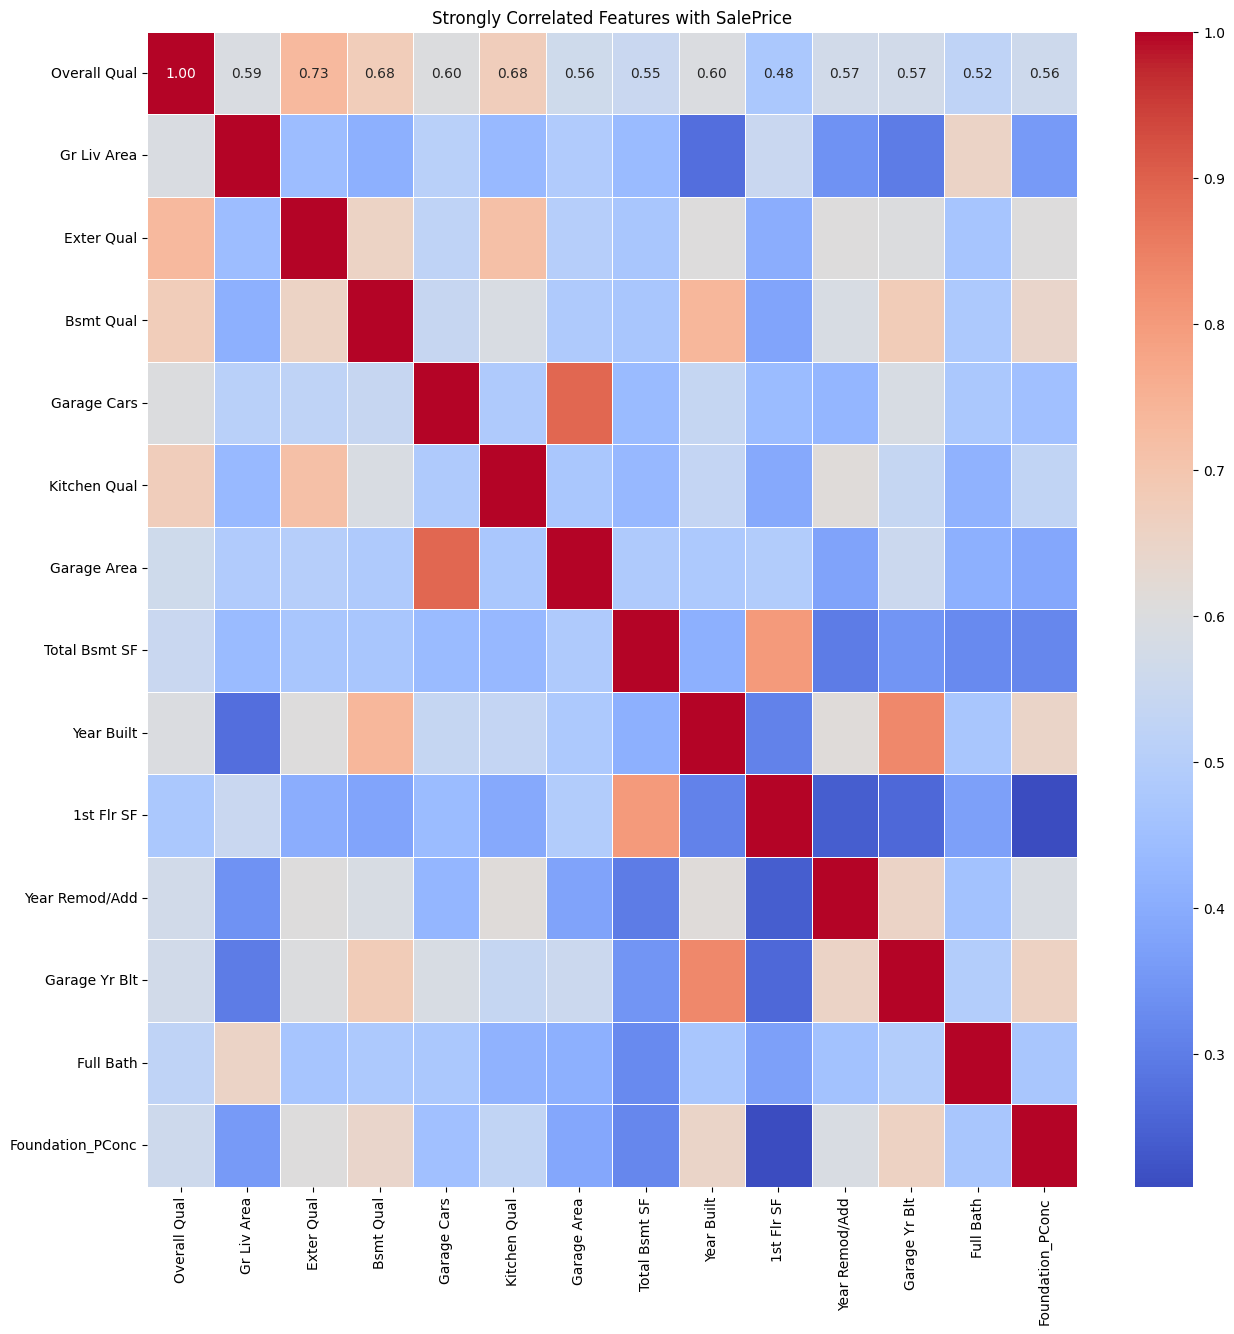

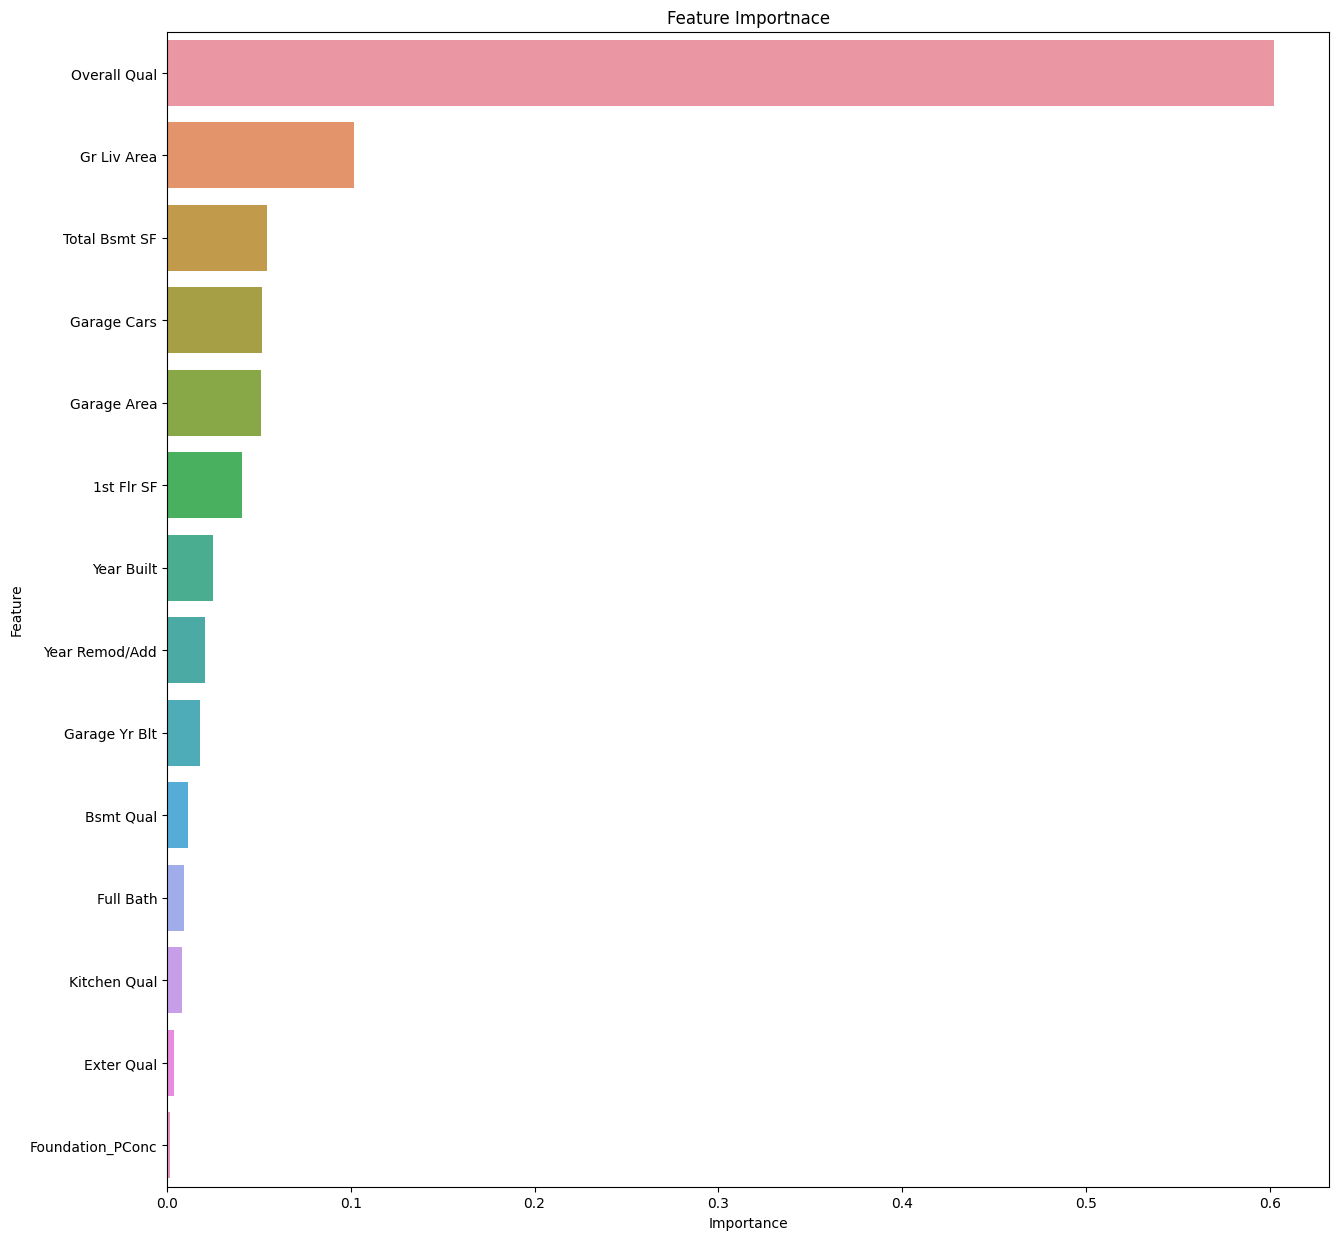

Index(['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars',
       'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'Bsmt Qual', 'Full Bath', 'Kitchen Qual', 'Exter Qual',
       'Foundation_PConc'],
      dtype='object')


In [29]:
corr_matrix = data.corr()

# Get correlations with target variable
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Filter features with correlation with correlation above 0.5
strong_correlation = saleprice_corr[abs(saleprice_corr) > 0.5].index.tolist()
strong_correlation.remove("SalePrice")

#Filter dataset to include only important features
X_fin=data[strong_correlation]
y=data['SalePrice']

#To find feature importance
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_fin,y)

#compute feature importance
imp=pd.Series(model.feature_importances_, index=X_fin.columns).sort_values(ascending=False)
imp_df=pd.DataFrame({"Feature": imp.index, 
                    "Importance": imp.values})

#Heatmap of strongly correlated Features
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix.loc[strong_correlation, strong_correlation], 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Strongly Correlated Features with SalePrice")
plt.show()

#Feature Importance Graph
plt.figure(figsize=(15,15))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importnace')

plt.show()

#selecting top most imp features
top=imp.index[:15].tolist()
X_fin=X_fin[top]
print(X_fin.columns)

9. Train Test Split

In [30]:
y=data["SalePrice"]
X_train, X_test, y_train, y_test=train_test_split(X_fin, y, test_size=0.2, random_state=42)

10. Train model

In [31]:
mod=RandomForestRegressor()
mod.fit(X_train, y_train)

RandomForestRegressor()

11. Accuracy and Error Metrics

In [32]:
print("Model Accuracy:", mod.score(X_test, y_test))

y_pred=mod.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
mse=np.mean((y_test-y_pred)**2)
rmse=np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: ", rmse)

Model Accuracy: 0.887577725833416
Mean Absolute Error: 0.09575950098701641
Mean Squared Error: 0.020801412659370744
Root Mean Squared Error:  0.14422694845059555


12. Visualisation

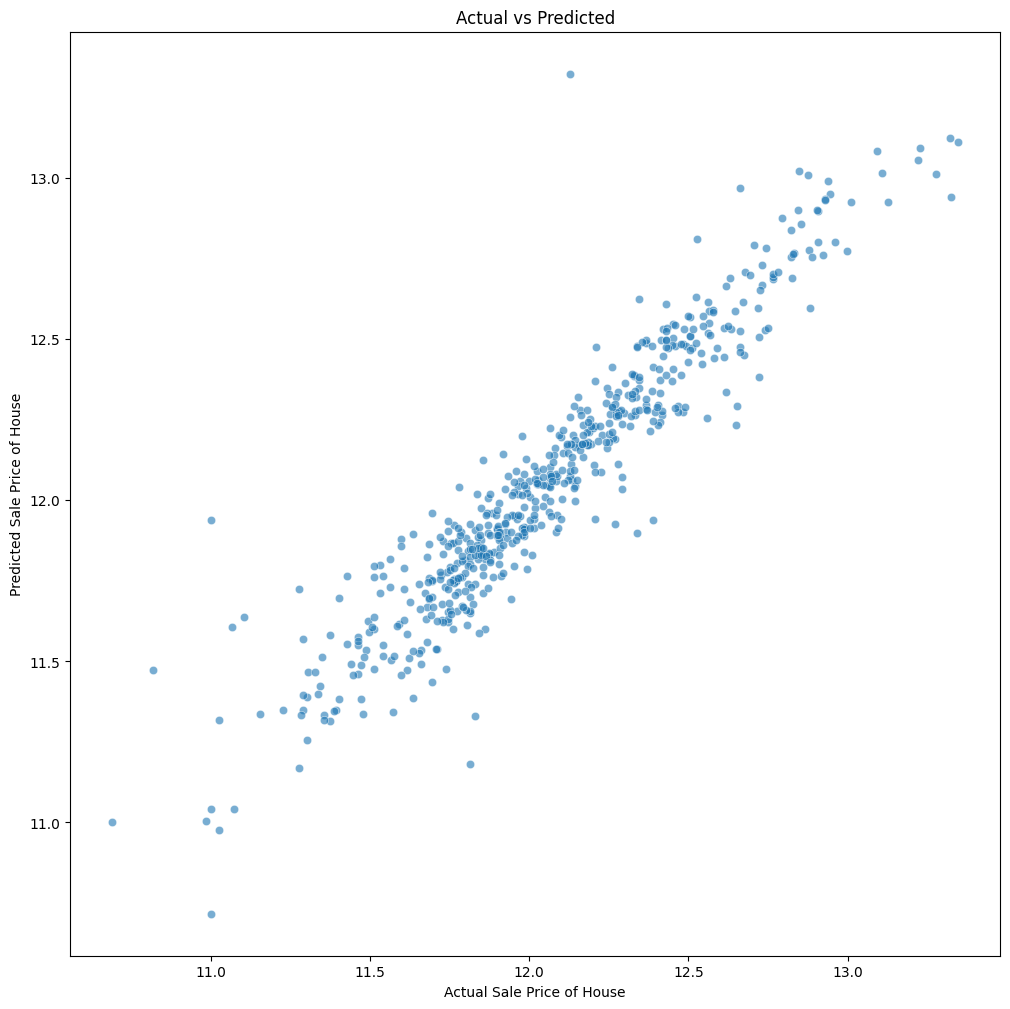

In [33]:
#comparing actual versus predicted values
plt.figure(figsize=(12, 12))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price of House")
plt.ylabel("Predicted Sale Price of House")
plt.title("Actual vs Predicted")
plt.show()

13. Hyperparameter Tuning

In [34]:
parameters={
    'n_estimators': [100, 200, 300], #number of trees
    'max_depth': [10, 20, None], #depth of each tree
    'min_samples_split': [2, 5, 10]
}


#performs grid search (cross validation)
grid_search = GridSearchCV(RandomForestRegressor(), parameters, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

#to get the best model
best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


14. Aaccuracy after tuning

In [35]:
y_pred_tuned = best.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred_tuned)
r2 = r2_score(y_test, y_pred_tuned)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.10
R² Score: 0.89


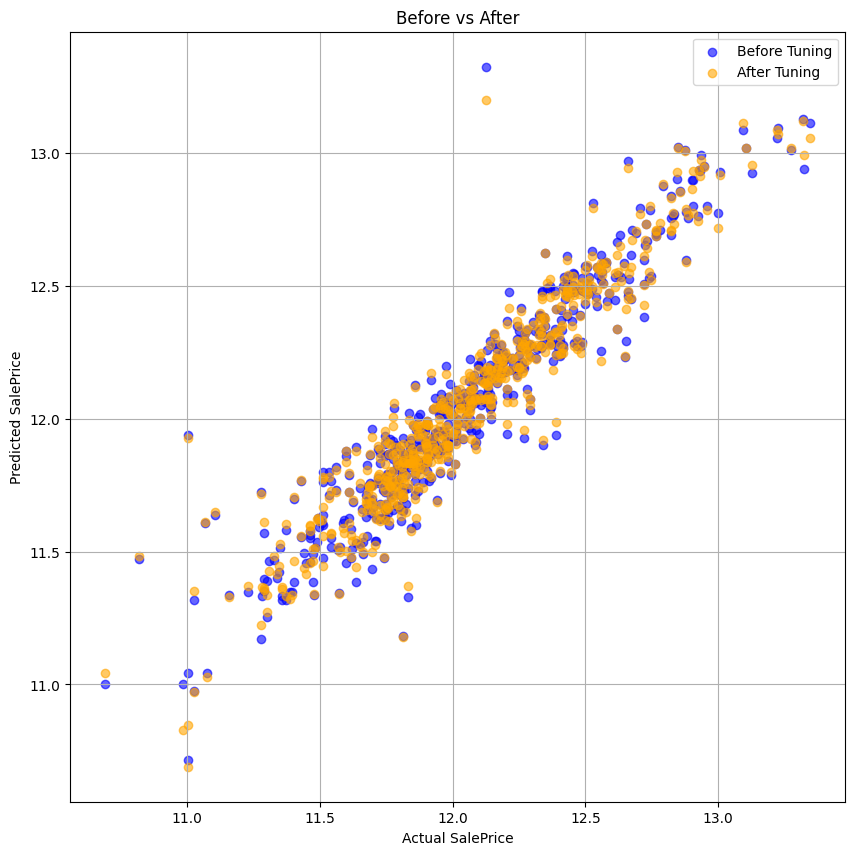

In [63]:
plt.figure(figsize=(10, 10))

# Scatterplot before tuning
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Before Tuning')

# Scatterplot after tuning
plt.scatter(y_test, y_pred_tuned, color='orange', alpha=0.6, label='After Tuning')


plt.title('Before vs After')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
X_fin.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,Garage Area,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt,Bsmt Qual,Full Bath,Kitchen Qual,Exter Qual,Foundation_PConc
0,6,7.412764,1080.0,2.0,528.0,1656,1960,1960,1960.0,3,1,3,3,0
1,5,6.799056,882.0,1.0,730.0,896,1961,1961,1961.0,3,1,3,3,0
2,6,7.192934,1329.0,1.0,312.0,1329,1958,1958,1958.0,3,1,4,3,0
3,7,7.654917,2110.0,2.0,522.0,2110,1968,1968,1968.0,3,2,5,4,0
4,5,7.396335,928.0,2.0,482.0,928,1997,1998,1997.0,4,2,3,3,1


15. Function for Prediction of Sale Price

In [58]:
final=['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars',
       'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'Bsmt Qual', 'Full Bath', 'Kitchen Qual', 'Exter Qual',
       'Foundation_PConc']

user_features={}

print("Enter house features for prediction o price: ")

for i in final:
    user_features[i]=float(input(f"Enter {i}: "))

user_df=pd.DataFrame([user_features])

price=best.predict(user_df)[0]

print(price)

Enter house features for prediction o price: 
12.417994052080513
